In [30]:
import sys, os
import glob
import csv
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import * 
import warnings
warnings.filterwarnings('ignore')

In [56]:
subtype = 'LGG'

In [57]:
DATA = Path(f'/data-nas/brains/MICCAI_BraTS2018/interim/{subtype}')
SAVE_PATH = %pwd
SAVE_PATH = f'{SAVE_PATH}/saved_csv_files/'

In [58]:
studies_path = sorted(glob.glob(str(DATA)+'/*'))
total_studies = len(studies_path)

In [59]:
def unique_values(studies_path):
 
    count_values = {}
    data_list = []
    for path in studies_path:
        study_id = (path.split("/")[-1])
        imgfn = (path + "/"+ study_id +"_seg.nii.gz")
        
        img, rnx, rny, rnz, data, affine = load_nifti(imgfn)
        
        #np_arr = np.unique(data) #unqiue values in a matrix 
        unique_arr, counts_arr = np.unique(data, return_counts=True)

        for i in unique_arr: 
            if i in count_values: count_values[i] += 1 
            else: count_values[i] = 1
        data_list.append([unique_arr,counts_arr])
                
    return count_values, data_list

In [60]:
dic_classes, data_list = unique_values(studies_path)
dic_classes

{0: 75, 1: 75, 2: 74, 4: 48}

In [61]:
data_list[0][1]

array([8878076,   21279,   10787,   17858])

In [62]:
info = []
for img_info in data_list: 
    total_size = img_info[1].sum()
    total = 0
    save_info = {}
    for idx,cls in enumerate(img_info[0]): 
        class_size = img_info[1][idx]
        size_in_img = class_size/total_size
        total += size_in_img
        save_info[cls] = size_in_img
    info.append(save_info)

# Create stratified split files: TODO move

In [80]:
df = pd.DataFrame(info)
df['file_path'] = studies_path
df.head()

,0,1,2,4,file_path
0,0.994408,0.002383,0.001208,0.002,/data-nas/brains/MICCAI_BraTS2018/interim/LGG/...
1,0.996590,0.000503,0.002907,NaN,/data-nas/brains/MICCAI_BraTS2018/interim/LGG/...
2,0.992820,0.000619,0.006562,NaN,/data-nas/brains/MICCAI_BraTS2018/interim/LGG/...
3,0.997884,0.001045,0.001071,NaN,/data-nas/brains/MICCAI_BraTS2018/interim/LGG/...
4,0.993084,0.004862,0.002054,NaN,/data-nas/brains/MICCAI_BraTS2018/interim/LGG/...


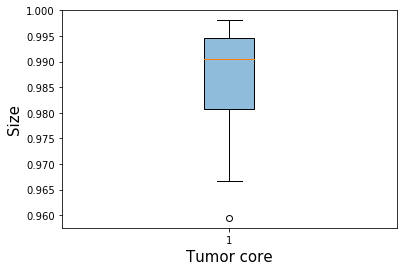

In [64]:
fig = plt.figure();
data = df[0] # df[1]+df[4]
box_plot = plt.boxplot(data, patch_artist=True)
plt.xlabel('Tumor core', fontsize=15)
plt.ylabel('Size', fontsize=15)
colors = ['#8fbcda']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

# Check depth

In [ ]:
def img_depth(studies_path):
 
    values = []
    for path in studies_path:
        study_id = (path.split("/")[-1])
        imgfn = (path + "/"+ study_id +"_seg.nii.gz")
        
        img, rnx, rny, rnz, data, affine = load_nifti(imgfn)
        depth = data.shape[2]
        values.append(depth)
    return values

In [ ]:
depth_values = img_depth(studies_path)

In [ ]:
np.unique(depth_values, return_counts=True)